# Book Recommendation System

# 사용 라이브러리

In [1]:
import os
import re
import nltk
import requests
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
nltk.download("stopwords")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk
nltk.download('punkt')
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

from PIL import Image
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('C:/Users/jgimn/Downloads/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jgimn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jgimn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Defaulting to user installation because normal site-packages is not writeable
C:/Users/jgimn/Downloads/archive\Book reviews\Book reviews\BX-Book-Ratings.csv
C:/Users/jgimn/Downloads/archive\Book reviews\Book reviews\BX-Users.csv
C:/Users/jgimn/Downloads/archive\Book reviews\Book reviews\BX_Books.csv
C:/Users/jgimn/Downloads/archive\Books Data with Category Language and Summary\Preprocessed_data.csv


# 데이터 소개

In [2]:
books = pd.read_csv('C:/Users/jgimn/Downloads/Preprocessed_data.csv')
books.head()

Unnamed: 0  user_id                   location      age        isbn  \
0           0        2  stockton, california, usa  18.0000  0195153448   
1           1        8   timmins, ontario, canada  34.7439  0002005018   
2           2    11400    ottawa, ontario, canada  49.0000  0002005018   
3           3    11676              n/a, n/a, n/a  34.7439  0002005018   
4           4    41385   sudbury, ontario, canada  34.7439  0002005018   

   rating           book_title           book_author  year_of_publication  \
0       0  Classical Mythology    Mark P. O. Morford               2002.0   
1       5         Clara Callan  Richard Bruce Wright               2001.0   
2       0         Clara Callan  Richard Bruce Wright               2001.0   
3       8         Clara Callan  Richard Bruce Wright               2001.0   
4       0         Clara Callan  Richard Bruce Wright               2001.0   

                 publisher                                              img_s  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
2    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
3    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
4    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                               img_m  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0002005018.0...   
3  http://images.amazon.com/images/P/0002005018.0...   
4  http://images.amazon.com/images/P/0002005018.0...   

                                               img_l  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0002005018.0...   
3  http://images.amazon.com/images/P/0002005018.0...   
4  http://images.amazon.com/images/P/0002005018.0...   

                                             Summary Language  \
0  Provides an introduction to classical myths pl...       en   
1  In a small town in Canada, Clara Callan reluct...       en   
2  In a small town in Canada, Clara Callan reluct...       en   
3  In a small town in Canada, Clara Callan reluct...       en   
4  In a small town in Canada, Clara Callan reluct...       en   

             Category      city       state country  
0  ['Social Science']  stockton  california     usa  
1       ['Actresses']   timmins     ontario  canada  
2       ['Actresses']    ottawa     ontario  canada  
3       ['Actresses']       NaN         NaN     NaN  
4       ['Actresses']   sudbury     ontario  canada

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031175 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

# 데이터 분석 및 시각화

Text(0.5, 1.0, 'No of books by an author (Top 15)')

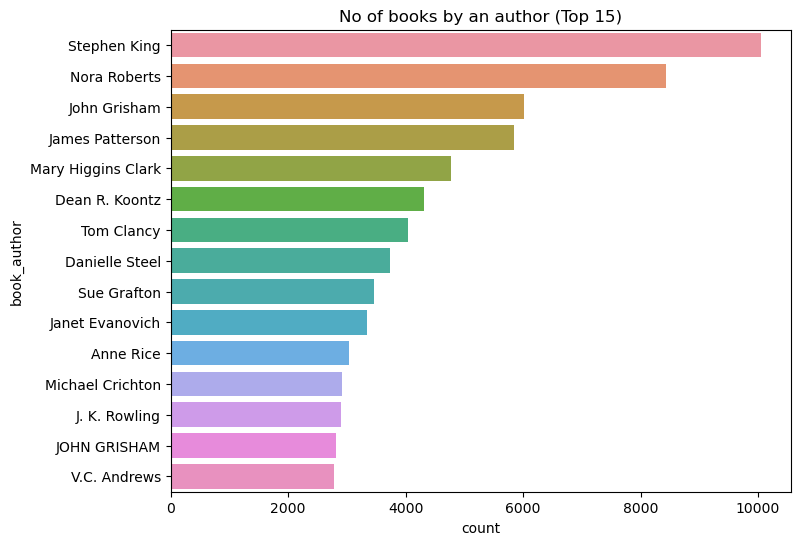

In [4]:
plt.figure(figsize=(8,6))
sns.countplot(y='book_author', data=books,order=books['book_author'].value_counts().index[0:15])
plt.title("No of books by an author (Top 15)")

Text(0.5, 1.0, 'No of books published by a publisher (Top 15)')

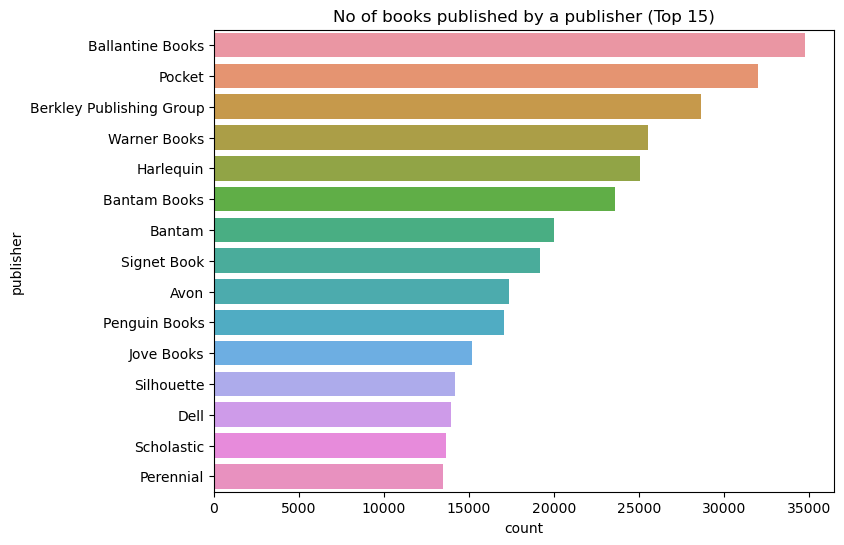

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(y='publisher', data=books,order=books['publisher'].value_counts().index[0:15])
plt.title("No of books published by a publisher (Top 15)")

Text(0.5, 1.0, 'Number of Ratings for a book (Top 15)')

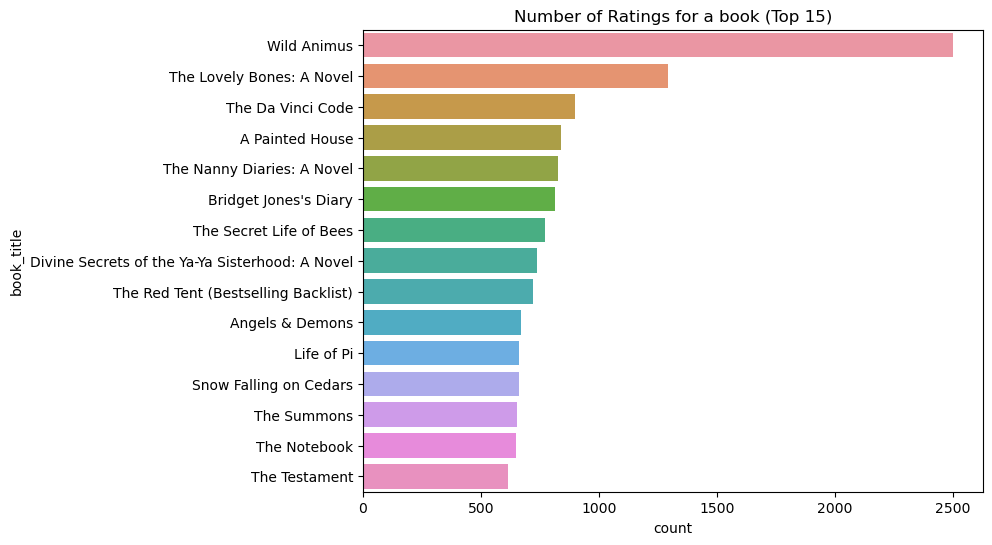

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(y='book_title', data=books, order=books['book_title'].value_counts().index[0:15])
plt.title("Number of Ratings for a book (Top 15)")

Text(0.5, 1.0, 'Book-Rating')

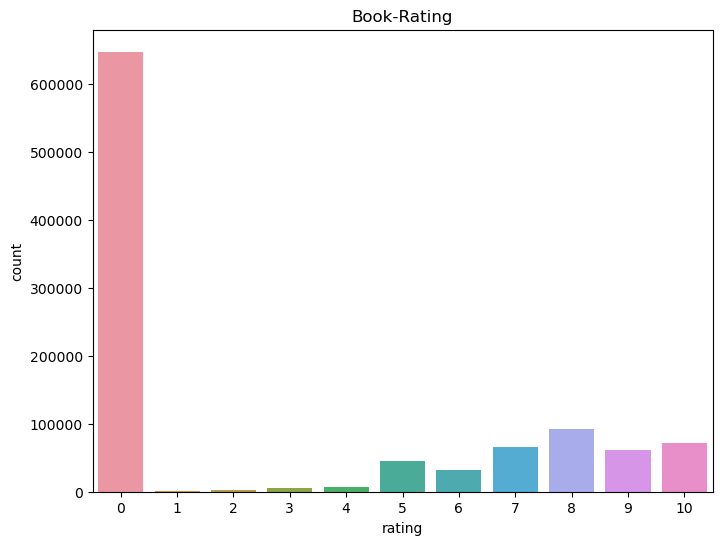

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(x="rating", data=books['rating'])
plt.title("Book-Rating")

Text(0.5, 1.0, 'Explicit Book-Rating')

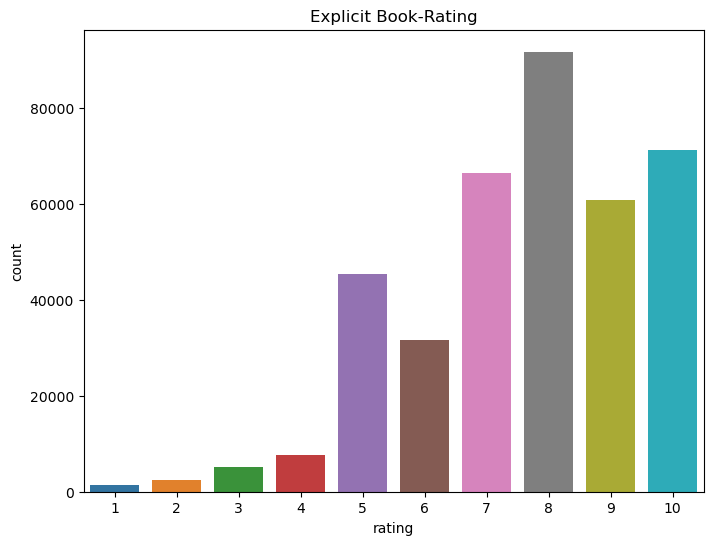

In [8]:
## Explicit Ratings
plt.figure(figsize=(8,6))
data = books[books['rating'] != 0]
sns.countplot(x="rating", data=data)
plt.title("Explicit Book-Rating")

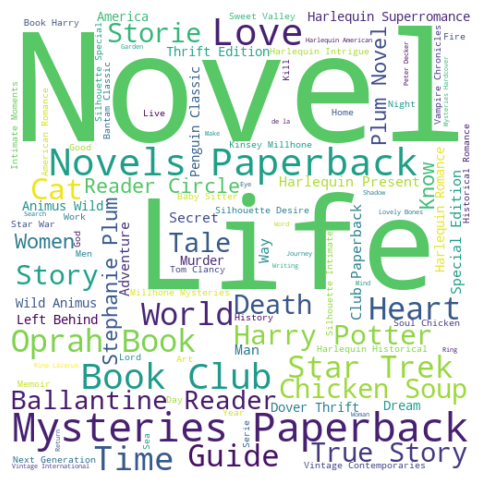

In [9]:
plt.subplots(figsize=(8,6))
wc = WordCloud(background_color="white", max_words=100, stopwords=STOPWORDS, max_font_size=256, 
               random_state=42, width=500, height=500)
wc.generate(' '.join(books['book_title']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

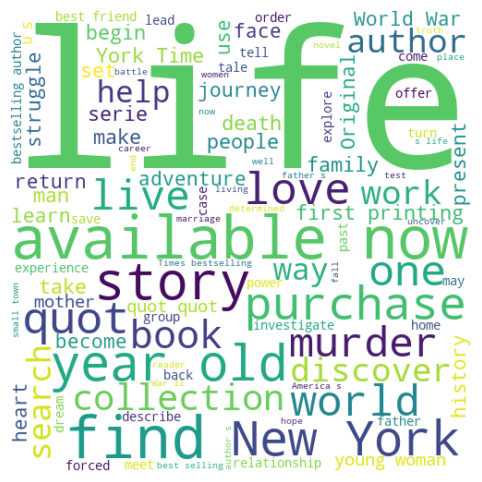

In [10]:
plt.subplots(figsize=(8,6))
wc = WordCloud(background_color="white", max_words=100, stopwords=STOPWORDS, max_font_size=256, 
               random_state=42, width=500, height=500)
wc.generate(' '.join(books['Summary']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

# 데이터 전처리

In [37]:
df = books.copy()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

df.drop(columns = ['Unnamed: 0','location','isbn','img_s','img_m','city','age',
                   'state','Language','country','year_of_publication'],axis=1,inplace = True) #필요없는 컬럼 삭제

df.drop(index=df[df['Category'] == '9'].index, inplace=True)

#df.drop(index=df[df['rating'] == 0].index, inplace=True)
#평점이 0인 경우 삭제

df['Category'] = df['Category'].apply(lambda x: re.sub('[\W_]+',' ',x).strip()) #카테고리에서 특수문자 제거

df.head()

user_id  rating           book_title           book_author  \
0        2       0  Classical Mythology    Mark P. O. Morford   
1        8       5         Clara Callan  Richard Bruce Wright   
2    11400       0         Clara Callan  Richard Bruce Wright   
3    41385       0         Clara Callan  Richard Bruce Wright   
4    67544       8         Clara Callan  Richard Bruce Wright   

                 publisher                                              img_l  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
2    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
3    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
4    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                             Summary        Category  
0  Provides an introduction to classical myths pl...  Social Science  
1  In a small town in Canada, Clara Callan reluct...       Actresses  
2  In a small town in Canada, Clara Callan reluct...       Actresses  
3  In a small town in Canada, Clara Callan reluct...       Actresses  
4  In a small town in Canada, Clara Callan reluct...       Actresses

In [38]:
df.shape

(596215, 8)

# 아이템 기반 추천 시스템

In [13]:
book_title = 'The Street Lawyer'
#책 제목 입력

rating_counts = pd.DataFrame(df['book_title'].value_counts())
rare_books = rating_counts[rating_counts['book_title'] <= 180].index
common_books = df[~df['book_title'].isin(rare_books)]

#유저 아이디와 책 제목 별로 평점을 구하기(피벗 테이블 만들기)
user_book_df = common_books.pivot_table(index=['user_id'], columns=['book_title'], values='rating')
user_book_df.head()

book_title  A Painted House  A Time to Kill  Bridget Jones's Diary  \
user_id                                                              
26                      NaN             NaN                    NaN   
51                      NaN             NaN                    NaN   
183                     NaN             NaN                    NaN   
242                     NaN             NaN                    NaN   
243                     7.0             NaN                    NaN   

book_title  Divine Secrets of the Ya-Ya Sisterhood: A Novel  Fahrenheit 451  \
user_id                                                                       
26                                                      NaN             NaN   
51                                                      NaN             NaN   
183                                                     NaN             9.0   
242                                                     NaN             8.0   
243                                                     NaN             NaN   

book_title  Girl with a Pearl Earring  Good in Bed  \
user_id                                              
26                                NaN          NaN   
51                                NaN          NaN   
183                               NaN          NaN   
242                               NaN          NaN   
243                               NaN          NaN   

book_title  Harry Potter and the Goblet of Fire (Book 4)  \
user_id                                                    
26                                                   NaN   
51                                                   NaN   
183                                                  NaN   
242                                                  NaN   
243                                                  NaN   

book_title  Harry Potter and the Order of the Phoenix (Book 5)  \
user_id                                                          
26                                                        NaN    
51                                                        NaN    
183                                                       NaN    
242                                                       NaN    
243                                                       NaN    

book_title  Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))  \
user_id                                                                        
26                                                        NaN                  
51                                                        NaN                  
183                                                       NaN                  
242                                                       NaN                  
243                                                       NaN                  

book_title  ...  The Nanny Diaries: A Novel  \
user_id     ...                               
26          ...                         NaN   
51          ...                         NaN   
183         ...                         NaN   
242         ...                         NaN   
243         ...                         NaN   

book_title  The Red Tent (Bestselling Backlist)  The Secret Life of Bees  \
user_id                                                                    
26                                          NaN                      NaN   
51                                          NaN                      NaN   
183                                         NaN                      NaN   
242                                         NaN                      NaN   
243                                         NaN                      NaN   

book_title  The Street Lawyer  The Summons  The Testament  Timeline  \
user_id                                                               
26                        NaN          NaN            NaN       NaN   
51                        9.0          NaN            N

In [14]:
book = user_book_df[book_title]
recom_data = pd.DataFrame(user_book_df.corrwith(book).sort_values(ascending=False)).reset_index(drop=False)
recom_data.head()

book_title         0
0                                  The Street Lawyer  1.000000
1                          Girl with a Pearl Earring  0.960769
2  Tuesdays with Morrie: An Old Man, a Young Man,...  0.845154
3                                      The Testament  0.844485
4                The Red Tent (Bestselling Backlist)  0.817424

In [15]:
if book_title in [book for book in recom_data['book_title']]:
    recom_data = recom_data.drop(recom_data[recom_data['book_title'] == book_title].index[0])
    #추천받으려고 하는 book_title이 포함되기 때문에 해당 행 삭제 필요

recom_book1 = []
recom_book1 = recom_data['book_title'].values.tolist()
del recom_book1[5:]
recom_book1

['Girl with a Pearl Earring',
 "Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",
 'The Testament',
 'The Red Tent (Bestselling Backlist)',
 'The Secret Life of Bees']

In [16]:
def item_based_recommender(book_title):
    
    book_title = str(book_title)
    if book_title in df['book_title'].values:
    
        rating_counts = pd.DataFrame(df['book_title'].value_counts())
        rare_books = rating_counts[rating_counts['book_title'] <= 180].index
        common_books = df[~df['book_title'].isin(rare_books)]
        
        if book_title in rare_books:
            
            random = pd.Series(common_books['book_title'].unique()).sample(2).values
            print('There are no recommendations for this book')
            print('Try: \n')
            print('{}'.format(random[0]),'\n')
            print('{}'.format(random[1]),'\n')
        
        else:
            user_book_df = common_books.pivot_table(index=['user_id'],
                                                    columns=['book_title'],
                                                    values='rating')
        
            book = user_book_df[book_title]
            recom_data = pd.DataFrame(user_book_df.corrwith(book). \
                                      sort_values(ascending=False)).reset_index(drop=False)
            
            if book_title in [book for book in recom_data['book_title']]:
                recom_data = recom_data.drop(recom_data[recom_data['book_title'] == book_title].index[0])
                
            low_rating = []
            for i in recom_data['book_title']:
                if df[df['book_title'] == i]['rating'].mean() < 5:
                    low_rating.append(i)
                    
            if recom_data.shape[0] - len(low_rating) > 5:
                recom_data = recom_data[~recom_data['book_title'].isin(low_rating)]
            
            recom_data = recom_data[0:5]    
            recom_data.columns = ['book_title','corr']
            
            fig, axs = plt.subplots(1, 5,figsize=(18,5))
            fig.suptitle('You may also like these books', size = 22)
            for i in range(len(recom_data['book_title'].tolist())):
        
                url = books.loc[books['book_title'] == recom_data['book_title'].tolist()[i],'img_l'][:1].values[0]
                im = Image.open(requests.get(url, stream=True).raw)
                axs[i].imshow(im)
                axs[i].axis("off")
                axs[i].set_title('Rating: {}'.format(round(df[df['book_title'] == recom_data['book_title'].tolist()[i]]['rating'].mean(),1)),
                             y=-0.18,
                                 color="red",
                                 fontsize=18)
                fig.show()
    else:
        print('Cant find book in dataset, please check spelling')

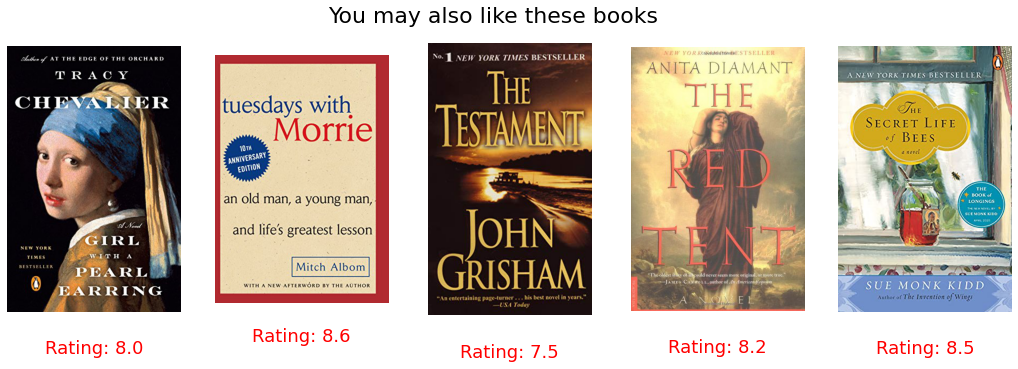

In [6]:
item_based_recommender('The Street Lawyer')

# 컨텐츠 기반 추천 시스템

## Title, Author, Publisher, Category  base

In [18]:
book_title = 'The Testament'

rating_counts = pd.DataFrame(df['book_title'].value_counts())
rare_books = rating_counts[rating_counts['book_title'] <= 100].index
common_books = df[~df['book_title'].isin(rare_books)]

common_books = common_books.drop_duplicates(subset=['book_title'])
#책 제목이 중복되는 행을 삭제

common_books.reset_index(inplace= True)
common_books['index'] = [i for i in range(common_books.shape[0])]
#인덱스 재정렬

common_books.head()

index  user_id  rating             book_title       book_author  \
0      0     3329       8          The Testament      John Grisham   
1      1      899       2            Wild Animus      Rich Shapero   
2      2       16       9               Airframe  Michael Crichton   
3      3     1376       8               Timeline  MICHAEL CRICHTON   
4      4       26      10  To Kill a Mockingbird        Harper Lee   

                publisher                                              img_l  \
0                    Dell  http://images.amazon.com/images/P/0440234743.0...   
1                 Too Far  http://images.amazon.com/images/P/0971880107.0...   
2        Ballantine Books  http://images.amazon.com/images/P/0345402871.0...   
3        Ballantine Books  http://images.amazon.com/images/P/0345417623.0...   
4  Little Brown & Company  http://images.amazon.com/images/P/0446310786.0...   

                                             Summary Category  
0  A suicidal billionaire, a burnt-out Washington...  Fiction  
1  Wild animus is a search for the primordial, a ...  Fiction  
2  A fatal mid-air collision involving a commerci...  Fiction  
3  Using a quantum time machine, a group of young...  Fiction  
4  The unforgettable novel of a childhood in a sl...  Fiction

In [19]:
target_cols = ['book_title','book_author','publisher','Category']
#타겟팅할 feature 정하기

common_books['combined'] = [' '.join(common_books[target_cols].iloc[i,].values) for i in range(common_books[target_cols].shape[0])]
#feature들의 값을 저장

common_books[target_cols].shape[0]
common_books.head()

index  user_id  rating             book_title       book_author  \
0      0     3329       8          The Testament      John Grisham   
1      1      899       2            Wild Animus      Rich Shapero   
2      2       16       9               Airframe  Michael Crichton   
3      3     1376       8               Timeline  MICHAEL CRICHTON   
4      4       26      10  To Kill a Mockingbird        Harper Lee   

                publisher                                              img_l  \
0                    Dell  http://images.amazon.com/images/P/0440234743.0...   
1                 Too Far  http://images.amazon.com/images/P/0971880107.0...   
2        Ballantine Books  http://images.amazon.com/images/P/0345402871.0...   
3        Ballantine Books  http://images.amazon.com/images/P/0345417623.0...   
4  Little Brown & Company  http://images.amazon.com/images/P/0446310786.0...   

                                             Summary Category  \
0  A suicidal billionaire, a burnt-out Washington...  Fiction   
1  Wild animus is a search for the primordial, a ...  Fiction   
2  A fatal mid-air collision involving a commerci...  Fiction   
3  Using a quantum time machine, a group of young...  Fiction   
4  The unforgettable novel of a childhood in a sl...  Fiction   

                                            combined  
0            The Testament John Grisham Dell Fiction  
1           Wild Animus Rich Shapero Too Far Fiction  
2  Airframe Michael Crichton Ballantine Books Fic...  
3  Timeline MICHAEL CRICHTON Ballantine Books Fic...  
4  To Kill a Mockingbird Harper Lee Little Brown ...

In [20]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(common_books['combined'])

column_names = cv.get_feature_names_out()
cv_df = pd.DataFrame(count_matrix.toarray(), columns = column_names)
cv_df.head()

1st  45  451  against  agency  airframe  albom  alex  alexander  along  \
0    0   0    0        0       0         0      0     0          0      0   
1    0   0    0        0       0         0      0     0          0      0   
2    0   0    0        0       0         1      0     0          0      0   
3    0   0    0        0       0         0      0     0          0      0   
4    0   0    0        0       0         0      0     0          0      0   

   ...  wind  witch  with  work  works  world  ya  you  young  your  
0  ...     0      0     0     0      0      0   0    0      0     0  
1  ...     0      0     0     0      0      0   0    0      0     0  
2  ...     0      0     0     0      0      0   0    0      0     0  
3  ...     0      0     0     0      0      0   0    0      0     0  
4  ...     0      0     0     0      0      0   0    0      0     0  

[5 rows x 487 columns]

In [21]:
cosine_sim = cosine_similarity(count_matrix)
#벡터화된 값의 코사인 유사도 구하기

cosine_sim

array([[1.        , 0.15430335, 0.16666667, ..., 0.72168784, 0.28867513,
        0.36514837],
       [0.15430335, 1.        , 0.15430335, ..., 0.13363062, 0.13363062,
        0.16903085],
       [0.16666667, 0.15430335, 1.        , ..., 0.14433757, 0.14433757,
        0.18257419],
       ...,
       [0.72168784, 0.13363062, 0.14433757, ..., 1.        , 0.25      ,
        0.31622777],
       [0.28867513, 0.13363062, 0.14433757, ..., 0.25      , 1.        ,
        0.15811388],
       [0.36514837, 0.16903085, 0.18257419, ..., 0.31622777, 0.15811388,
        1.        ]])

In [22]:
index = common_books[common_books['book_title'] == book_title]['index'].values[0]

sim_books = list(enumerate(cosine_sim[index]))
#리스트의 원소에 순서값을 부여해주는 함수

sorted_sim_books = sorted(sim_books,key=lambda x:x[1], reverse=True)[1:6]
#내림차순으로 정렬하고 5개의 값을 저장

sorted_sim_books

[(59, 0.8333333333333336),
 (7, 0.7715167498104596),
 (87, 0.7216878364870323),
 (97, 0.7216878364870323),
 (78, 0.6666666666666669)]

In [23]:
recom_book2 = []
for i in range(len(sorted_sim_books)):
    recom_book2.append(common_books[common_books['index'] == sorted_sim_books[i][0]]['book_title'].item())
    #리스트에 index 값에 해당하는 book_title 값을 저장
    
recom_book2

['The Rainmaker',
 'The Street Lawyer',
 'The Chamber',
 'The Summons',
 'The Brethren']

In [24]:
def content_based_recommender(book_title):
    
    book_title = str(book_title)
    if book_title in df['book_title'].values:
        rating_counts = pd.DataFrame(df['book_title'].value_counts())
        rare_books = rating_counts[rating_counts['book_title'] <= 100].index
        common_books = df[~df['book_title'].isin(rare_books)]
        
        if book_title in rare_books:
            
            random = pd.Series(common_books['book_title'].unique()).sample(2).values
            print('There are no recommendations for this book')
            print('Try: \n')
            print('{}'.format(random[0]),'\n')
            print('{}'.format(random[1]),'\n')
        
        else:
            
            common_books = common_books.drop_duplicates(subset=['book_title'])
            common_books.reset_index(inplace= True)
            common_books['index'] = [i for i in range(common_books.shape[0])]
            target_cols = ['book_title','book_author','publisher','Category']
            common_books['combined_features'] = [' '.join(common_books[target_cols].iloc[i,].values) for i in range(common_books[target_cols].shape[0])]
            cv = CountVectorizer()
            count_matrix = cv.fit_transform(common_books['combined_features'])
            cosine_sim = cosine_similarity(count_matrix)
            index = common_books[common_books['book_title'] == book_title]['index'].values[0]
            sim_books = list(enumerate(cosine_sim[index]))
            sorted_sim_books = sorted(sim_books,key=lambda x:x[1],
                                      reverse=True)[1:6]
            
            books = []
            for i in range(len(sorted_sim_books)):
                books.append(common_books[common_books['index'] == sorted_sim_books[i][0]]['book_title'].item())
            
            fig, axs = plt.subplots(1, 5,figsize=(18,5))
            fig.suptitle('You may also like these books', size = 22)
            for i in range(len(books)):
        
                url = common_books.loc[common_books['book_title'] == books[i],'img_l'][:1].values[0]
                im = Image.open(requests.get(url, stream=True).raw)
                axs[i].imshow(im)
                axs[i].axis("off")
                axs[i].set_title('Rating: {}'.format(round(df[df['book_title'] == books[i]]['rating'].mean(),1)),
                             y=-0.18,
                                 color="red",
                                 fontsize=18)
                fig.show()
                     
    else:
        
        print('Cant find book in dataset, please check spelling')

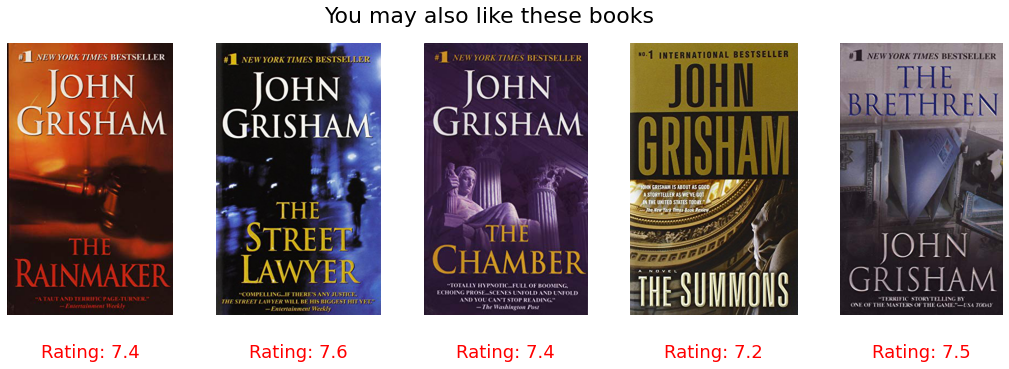

In [9]:
content_based_recommender('The Testament')

## Summary  base

In [25]:
book_title = 'To Kill a Mockingbird'

rating_counts = pd.DataFrame(df['book_title'].value_counts())
rare_books = rating_counts[rating_counts['book_title'] <= 100].index
common_books = df[~df['book_title'].isin(rare_books)]

common_books = common_books.drop_duplicates(subset=['book_title'])
common_books.reset_index(inplace= True)
common_books['index'] = [i for i in range(common_books.shape[0])]

summary_filtered = []

#줄거리 필터링하기
for i in common_books['Summary']:
    i = re.sub("[^a-zA-Z]"," ",i).lower()
    #문자가 아닌 데이터를 찾아서 공백으로 대체
    i = nltk.word_tokenize(i)
    #단어 단위로 나누기
    i = [word for word in i if not word in set(stopwords.words("english"))]
    #stopwords.words("english")는 NLTK가 정의한 영어 불용어 리스트를 리턴, 불용어 제거
    i = " ".join(i)
    summary_filtered.append(i)
    
print(summary_filtered[0:5])

['suicidal billionaire burnt washington litigator woman forsaken technology work wilds brazil brought together astounding mystery testament', 'wild animus search primordial test human foundations journey breaking point', 'fatal mid air collision involving commercial airliner prompts frantic desperate investigation causes accident thriller exploring issue safety security aircraft industry', 'using quantum time machine group young historians sent back year rescue trapped project leader', 'unforgettable novel childhood sleepy southern town crisis conscience rocked kill mockingbird became instant bestseller critical success first published']


In [33]:
common_books['Summary'] = summary_filtered
cv = CountVectorizer()
count_matrix = cv.fit_transform(common_books['Summary'])

column_names = cv.get_feature_names_out()
cv_df = pd.DataFrame(count_matrix.toarray(), columns = column_names)
cv_df.head()

abandoning  abilities  able  accident  acclaimed  accompanied  accused  \
0           0          0     0         0          0            0        0   
1           0          0     0         0          0            0        0   
2           0          0     0         1          0            0        0   
3           0          0     0         0          0            0        0   
4           0          0     0         0          0            0        0   

   across  act  ad  ...  year  yearns  years  yet  york  yorker  young  \
0       0    0   0  ...     0       0      0    0     0       0      0   
1       0    0   0  ...     0       0      0    0     0       0      0   
2       0    0   0  ...     0       0      0    0     0       0      0   
3       0    0   0  ...     1       0      0    0     0       0      1   
4       0    0   0  ...     0       0      0    0     0       0      0   

   youngest  youngsters  zilpah  
0         0           0       0  
1         0           0       0  
2         0           0       0  
3         0           0       0  
4         0           0       0  

[5 rows x 1212 columns]

In [34]:
cosine_sim = cosine_similarity(count_matrix)
index = common_books[common_books['book_title'] == book_title]['index'].values[0]
sim_books = list(enumerate(cosine_sim[index]))
sorted_sim_books = sorted(sim_books,key=lambda x:x[1],reverse=True)[1:6]

recom_book3 = []
for i in range(len(sorted_sim_books)):
    recom_book3.append(common_books[common_books['index'] == sorted_sim_books[i][0]]['book_title'].item())
    
recom_book3

["Bridget Jones's Diary",
 'The Green Mile',
 'Empire Falls',
 'The King of Torts',
 'Divine Secrets of the Ya-Ya Sisterhood: A Novel']

In [27]:
def content_based_recommender2(book_title):
    
    book_title = str(book_title)
    if book_title in df['book_title'].values:
        rating_counts = pd.DataFrame(df['book_title'].value_counts())
        rare_books = rating_counts[rating_counts['book_title'] <= 100].index
        common_books = df[~df['book_title'].isin(rare_books)]
        
        if book_title in rare_books:
            
            random = pd.Series(common_books['book_title'].unique()).sample(2).values
            print('There are no recommendations for this book')
            print('Try: \n')
            print('{}'.format(random[0]),'\n')
            print('{}'.format(random[1]),'\n')
        
        else:
            common_books = common_books.drop_duplicates(subset=['book_title'])
            common_books.reset_index(inplace= True)
            common_books['index'] = [i for i in range(common_books.shape[0])]
            
            summary_filtered = []
            for i in common_books['Summary']:
                
                i = re.sub("[^a-zA-Z]"," ",i).lower()
                i = nltk.word_tokenize(i)
                i = [word for word in i if not word in set(stopwords.words("english"))]
                i = " ".join(i)
                summary_filtered.append(i)
            
            common_books['Summary'] = summary_filtered   
            cv = CountVectorizer()
            count_matrix = cv.fit_transform(common_books['Summary'])
            cosine_sim = cosine_similarity(count_matrix)
            index = common_books[common_books['book_title'] == book_title]['index'].values[0]
            sim_books = list(enumerate(cosine_sim[index]))
            sorted_sim_books = sorted(sim_books,key=lambda x:x[1],reverse=True)[1:6]
            
            books = []
            for i in range(len(sorted_sim_books)):
                books.append(common_books[common_books['index'] == sorted_sim_books[i][0]]['book_title'].item())
            
            fig, axs = plt.subplots(1, 5,figsize=(18,5))
            fig.suptitle('You may also like these books', size = 22)
            for i in range(len(books)):
        
                url = common_books.loc[common_books['book_title'] == books[i],'img_l'][:1].values[0]
                im = Image.open(requests.get(url, stream=True).raw)
                axs[i].imshow(im)
                axs[i].axis("off")
                axs[i].set_title('Rating: {}'.format(round(df[df['book_title'] == books[i]]['rating'].mean(),1)),
                             y=-0.18,
                                 color="red",
                                 fontsize=18)
                fig.show()
                     
    else:
        
        print('Cant find book in dataset, please check spelling')

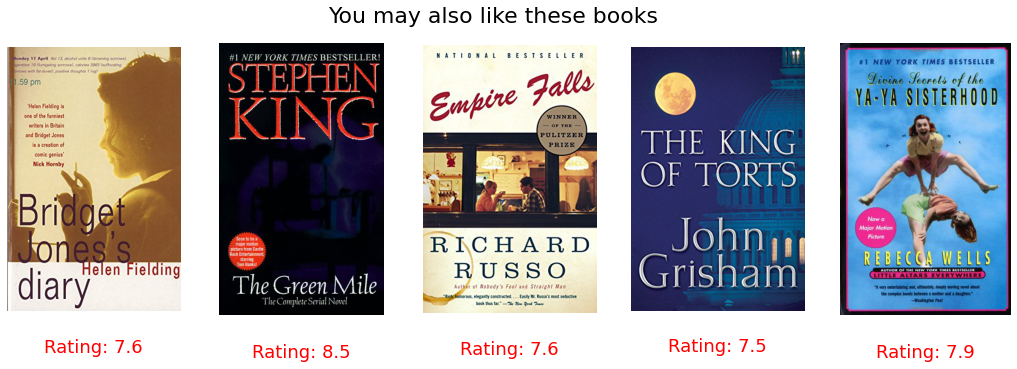

In [13]:
content_based_recommender2('To Kill a Mockingbird')

# 결론

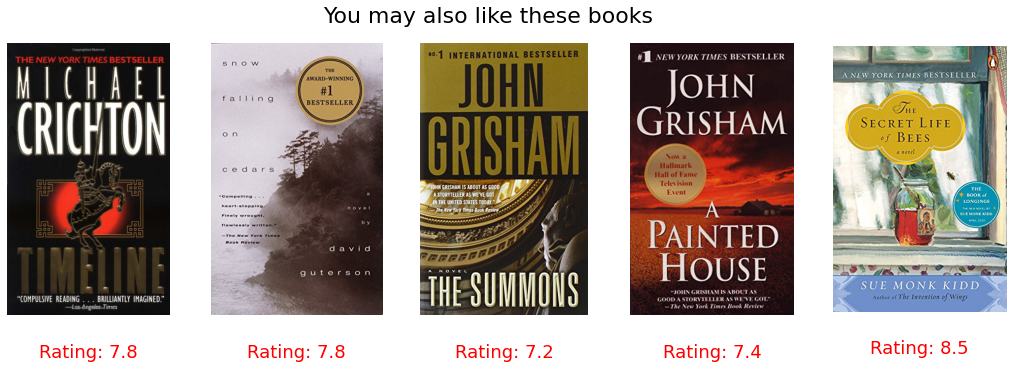

In [20]:
item_based_recommender('Harry Potter and the Order of the Phoenix (Book 5)')

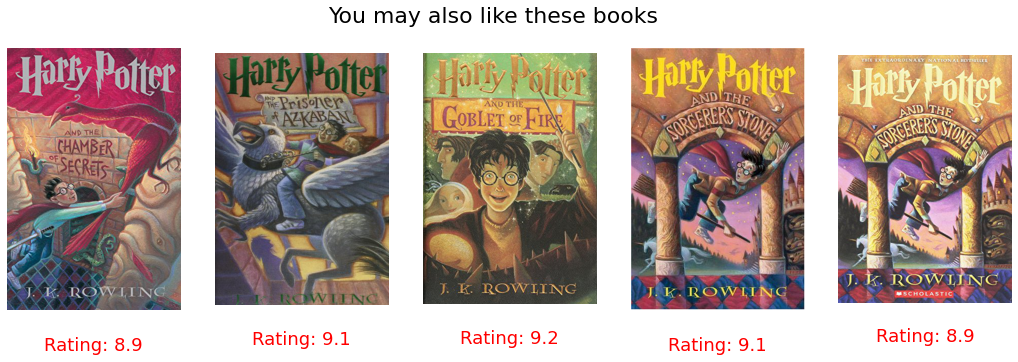

In [21]:
content_based_recommender('Harry Potter and the Order of the Phoenix (Book 5)')

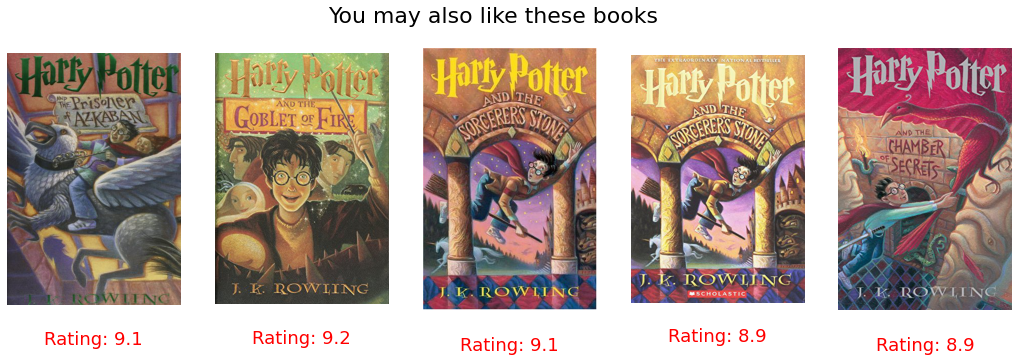

In [22]:
content_based_recommender2('Harry Potter and the Order of the Phoenix (Book 5)')

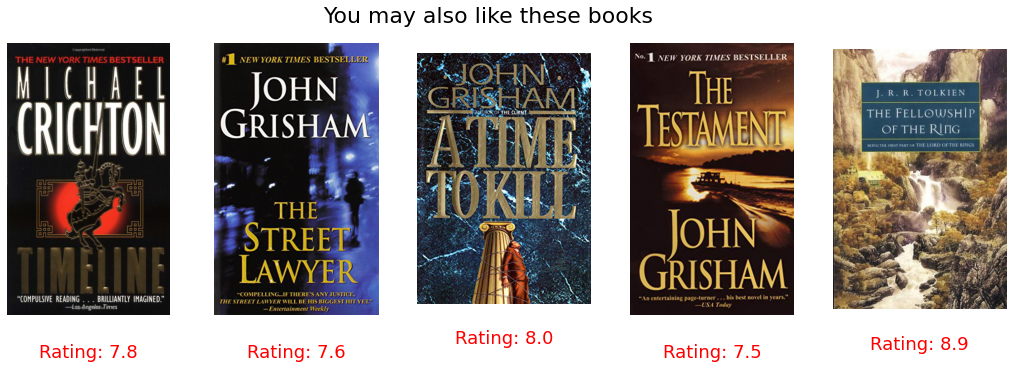

In [24]:
item_based_recommender('Girl with a Pearl Earring')

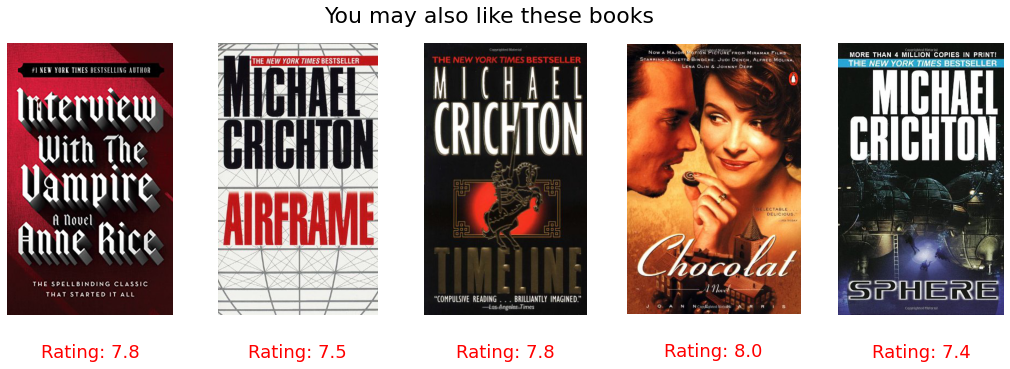

In [25]:
content_based_recommender('Girl with a Pearl Earring')

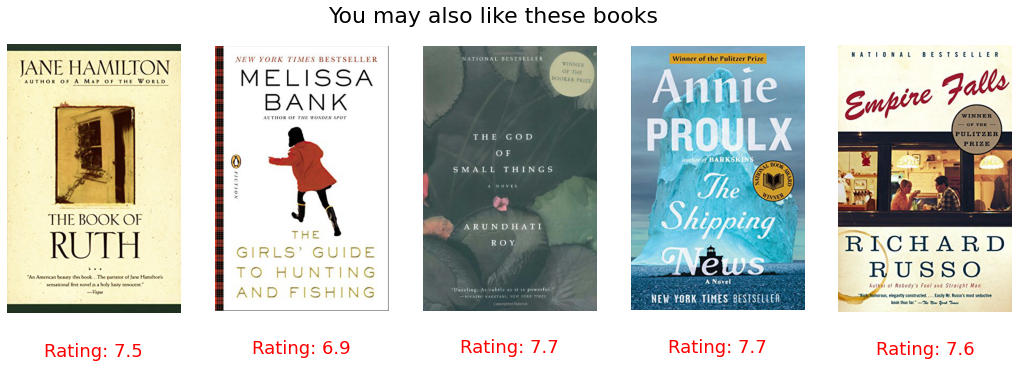

In [26]:
content_based_recommender2('Girl with a Pearl Earring')